Import Library

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv('/content/drive/MyDrive/bigdata/vle.csv')

EDA

In [44]:
df

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [45]:
# Melihat informasi dasar tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan 5 baris pertama dari dataset
print("\n5 Baris Pertama Dataset:")
print(df.head())

# Menampilkan 5 baris terakhir dari dataset
print("\n5 Baris terakhir Dataset:")
print(df.tail())

# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# Statistik deskriptif untuk kolom kategorikal
print(df.describe(include='object'))

# Melihat jumlah missing values pada setiap kolom
print("\nJumlah Missing Values pada Setiap Kolom:")
print(df.isnull().sum())

# shape dataset
print("\nShape Dataset:")
print(df.shape)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB
None

5 Baris Pertama Dataset:
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AA

Preprocessing

In [46]:
# Periksa data yang hilang
missing_data = df.isnull().sum()
print(missing_data)

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


In [47]:
# Menampilkan jumlah missing values pada setiap kolom
missing_data = df.isnull().sum()

# Menampilkan kolom-kolom dengan missing values (jika ada)
columns_with_missing_data = missing_data[missing_data > 0]
print("Kolom dengan Missing Values:")
print(columns_with_missing_data)

# Menampilkan jumlah total missing values dalam dataset
total_missing_values = missing_data.sum()
print("\nTotal Missing Values dalam Dataset:", total_missing_values)

Kolom dengan Missing Values:
week_from    5243
week_to      5243
dtype: int64

Total Missing Values dalam Dataset: 10486


In [48]:
# Menghapus baris dengan nilai yang hilang
df = df.dropna()

In [49]:
# Mengganti nilai yang hilang dengan rata-rata kolom
df['week_from'].fillna(df['week_from'].mean(), inplace=True)
df['week_to'].fillna(df['week_to'].mean(), inplace=True)

<ipython-input-49-226797756ff3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_from'].fillna(df['week_from'].mean(), inplace=True)
<ipython-input-49-226797756ff3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_to'].fillna(df['week_to'].mean(), inplace=True)


In [50]:
# Menampilkan jumlah missing values pada setiap kolom
missing_data = df.isnull().sum()

# Menampilkan kolom-kolom dengan missing values (jika ada)
columns_with_missing_data = missing_data[missing_data > 0]
print("Kolom dengan Missing Values:")
print(columns_with_missing_data)

# Menampilkan jumlah total missing values dalam dataset
total_missing_values = missing_data.sum()
print("\nTotal Missing Values dalam Dataset:", total_missing_values)

Kolom dengan Missing Values:
Series([], dtype: int64)

Total Missing Values dalam Dataset: 0


In [51]:
df

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


Visualitation

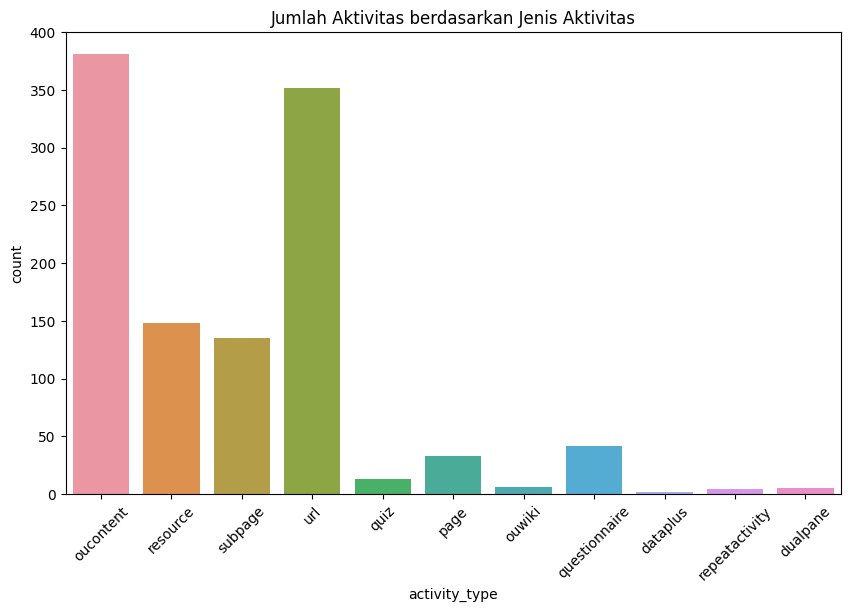

In [52]:
# Plot jumlah aktivitas berdasarkan jenis aktivitas
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='activity_type')
plt.title('Jumlah Aktivitas berdasarkan Jenis Aktivitas')
plt.xticks(rotation=45)
plt.show()

<ipython-input-53-953f63e59f9e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


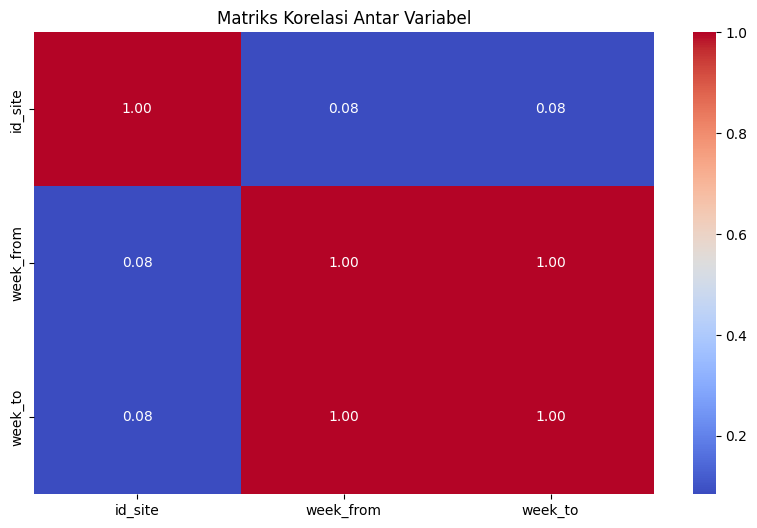

In [53]:
# Misalnya, jika ada variabel numerik 'nilai':
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

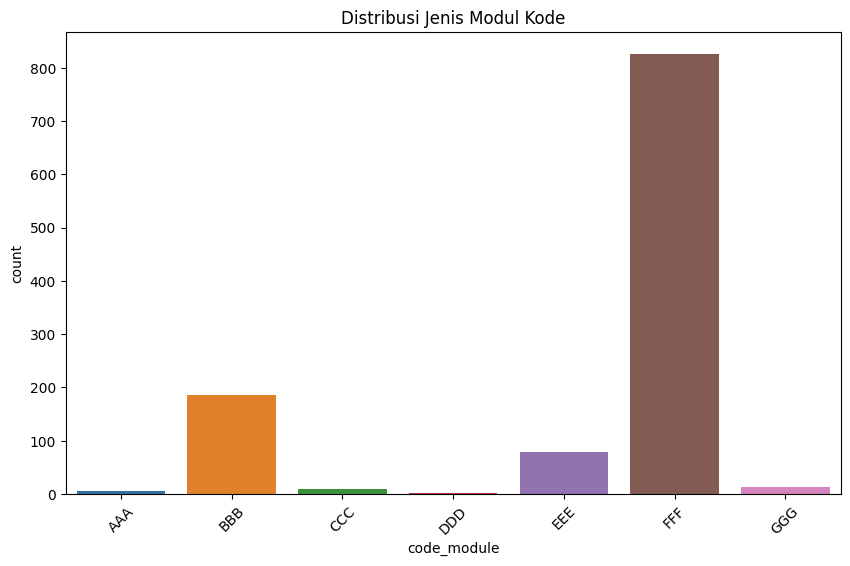

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='code_module')
plt.title('Distribusi Jenis Modul Kode')
plt.xticks(rotation=45)
plt.show()

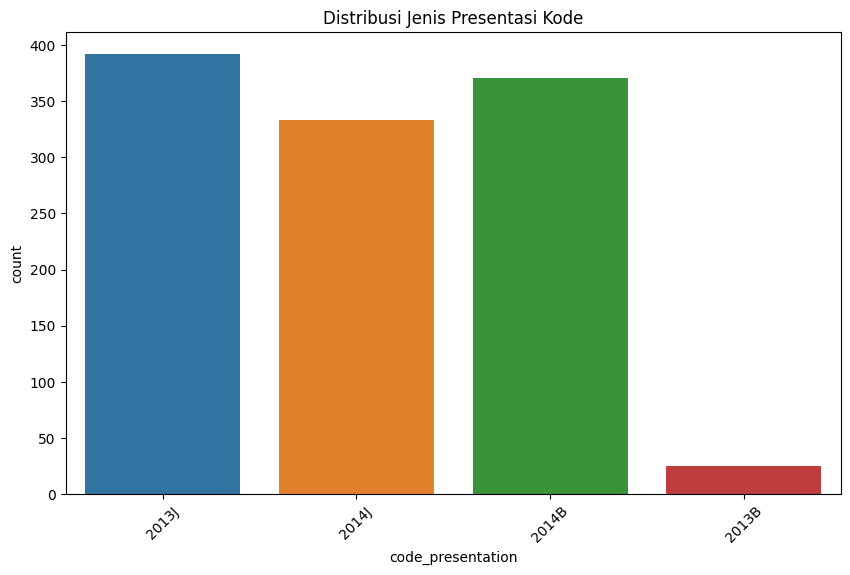

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='code_presentation')
plt.title('Distribusi Jenis Presentasi Kode')
plt.xticks(rotation=45)
plt.show()

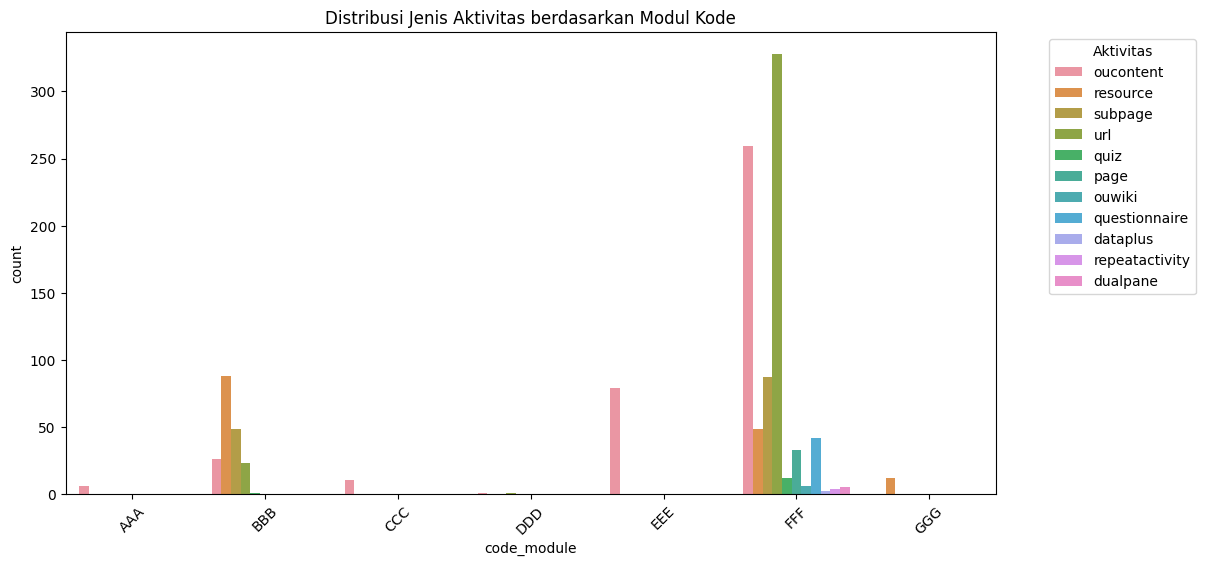

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='code_module', hue='activity_type')
plt.title('Distribusi Jenis Aktivitas berdasarkan Modul Kode')
plt.xticks(rotation=45)
plt.legend(title='Aktivitas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-57-f222217db097>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_from'] = pd.to_numeric(data['week_from'], errors='coerce')
<ipython-input-57-f222217db097>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_to'] = pd.to_numeric(data['week_to'], errors='coerce')


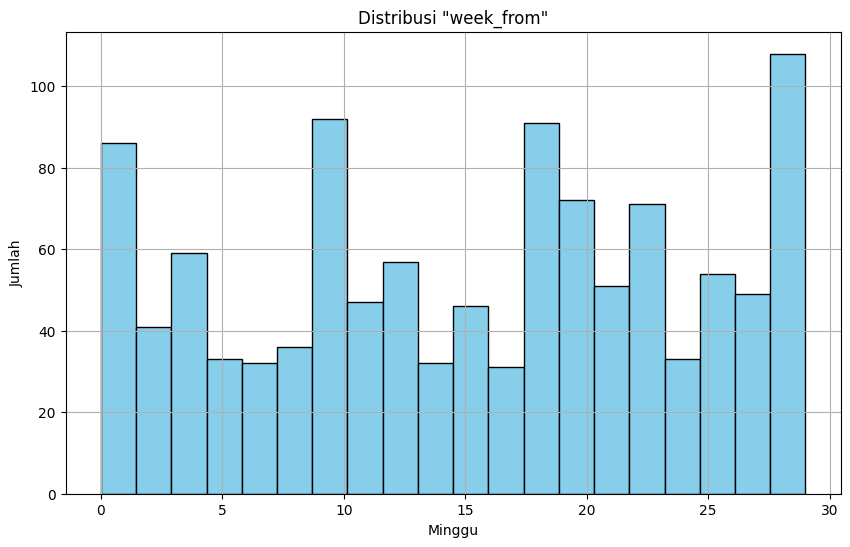

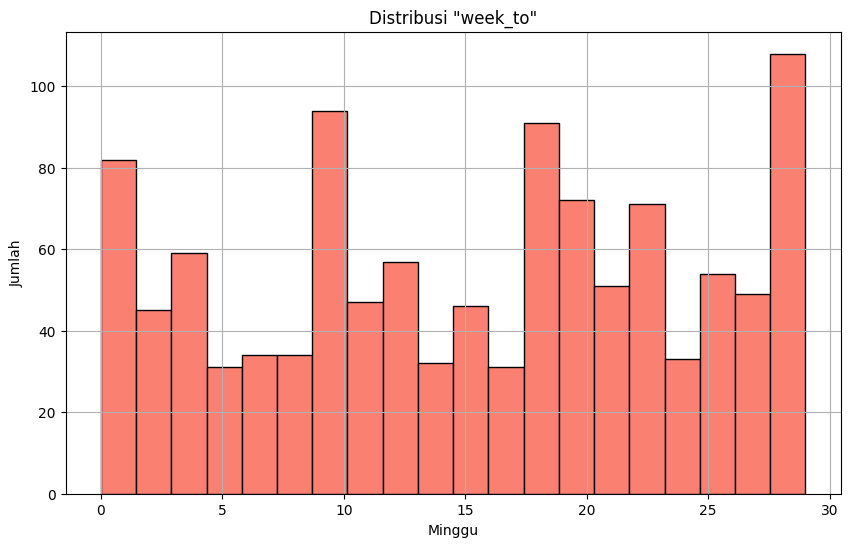

In [57]:
import matplotlib.pyplot as plt

# Konversi kolom "week_from" dan "week_to" menjadi tipe data numerik (jika belum)
data['week_from'] = pd.to_numeric(data['week_from'], errors='coerce')
data['week_to'] = pd.to_numeric(data['week_to'], errors='coerce')

# Visualisasi distribusi "week_from"
plt.figure(figsize=(10, 6))
plt.hist(data['week_from'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi "week_from"')
plt.xlabel('Minggu')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()

# Visualisasi distribusi "week_to"
plt.figure(figsize=(10, 6))
plt.hist(data['week_to'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribusi "week_to"')
plt.xlabel('Minggu')
plt.ylabel('Jumlah')
plt.grid(True)
plt.show()